# Assignment 6

## Question 2

#### 2.3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
titanic = pd.read_csv("titanic3.csv")
titanic.loc[(titanic.sex == "female"), "Sex"] = 0
titanic.loc[(titanic.sex == "male"), "Sex"] = 1
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Sex
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",0.0
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1.0
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0.0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1.0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0.0


In [3]:
titanic = titanic[["pclass", "Sex", "age", "survived"]].dropna()

feature_cols = ["pclass", "Sex", "age"]
X = titanic[feature_cols]
y = titanic.survived

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

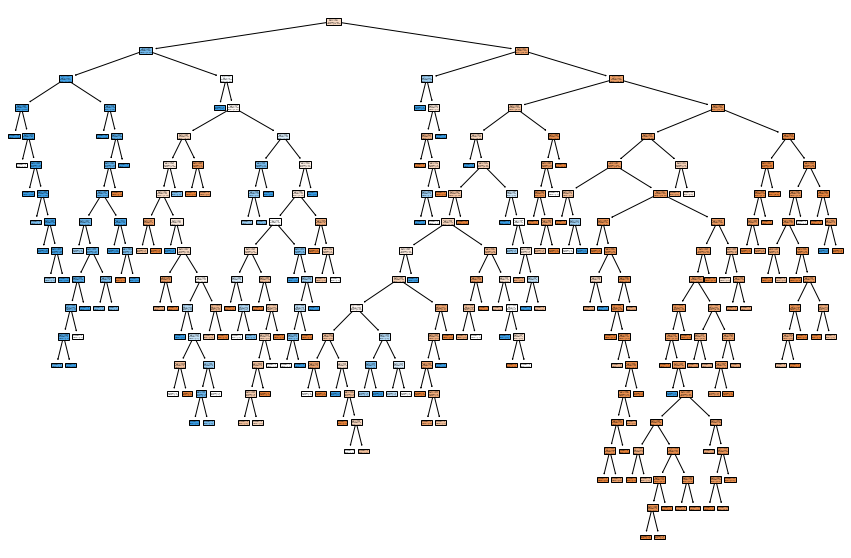

In [5]:
plt.figure(figsize=(15,10));
tree.plot_tree(clf,filled=True);

#### 2.4

In [6]:
y_pred=clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7977099236641222

In [7]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [8]:
ccp_alphas

array([0.00000000e+00, 0.00000000e+00, 7.08616780e-06, 2.12585034e-05,
       3.54308390e-05, 3.54308390e-05, 4.25170068e-05, 4.90580848e-05,
       5.66893424e-05, 6.54107797e-05, 6.71321160e-05, 7.97448166e-05,
       8.50340136e-05, 8.50340136e-05, 8.50340136e-05, 8.75350140e-05,
       1.16804964e-04, 1.27551020e-04, 1.45772595e-04, 1.45772595e-04,
       1.53226875e-04, 1.67135820e-04, 1.71030783e-04, 2.12585034e-04,
       2.12585034e-04, 2.12585034e-04, 2.12585034e-04, 2.12585034e-04,
       2.12585034e-04, 2.38911354e-04, 2.44752506e-04, 2.45290424e-04,
       2.55102041e-04, 2.55102041e-04, 2.57554945e-04, 2.67094017e-04,
       2.83446712e-04, 3.18877551e-04, 3.23842548e-04, 3.27053898e-04,
       3.30687831e-04, 3.39732412e-04, 3.40136054e-04, 3.40136054e-04,
       3.76766091e-04, 4.25170068e-04, 4.25170068e-04, 4.25170068e-04,
       4.54181673e-04, 5.06154843e-04, 5.10204082e-04, 5.23286238e-04,
       5.47567512e-04, 5.48790945e-04, 5.95051992e-04, 6.30123844e-04,
      

In [9]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.15495433401804537


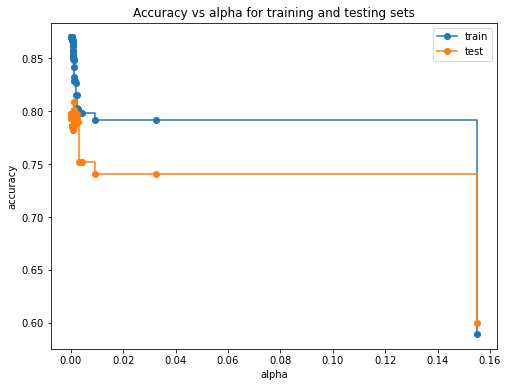

In [10]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize = (8,6))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [11]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.003)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.003, random_state=0)

In [12]:
pred=clf.predict(X_test)
accuracy_score(y_test, pred)

0.7900763358778626

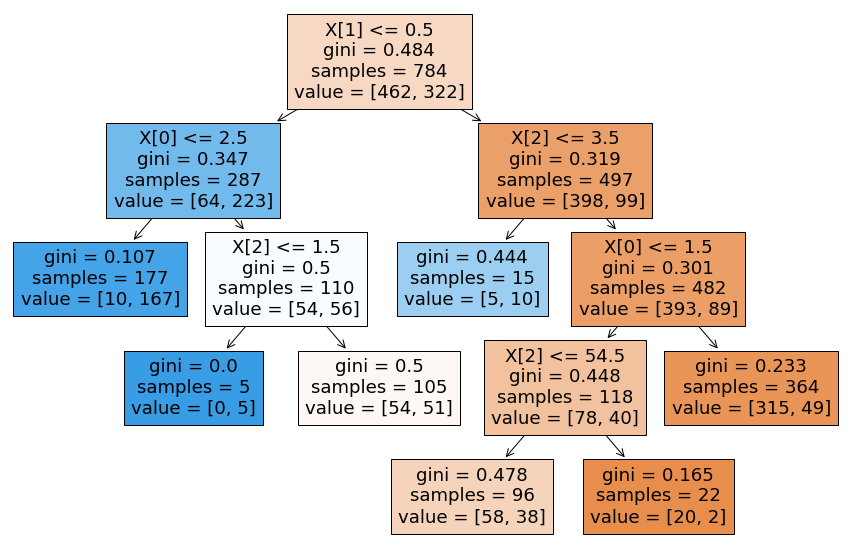

In [13]:
plt.figure(figsize=(15,10));
tree.plot_tree(clf,filled=True);

#### 2.5

### Logistic Regression of Titanic Dataset

In [14]:
titanic = titanic[["pclass", "Sex", "age", "survived"]].dropna()
feature_cols = ["pclass", "Sex", "age"]
X = titanic[feature_cols]
y = titanic.survived
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
accuracy_score(y_test, y_pred)

0.7595419847328244

## Question 3

#### 3.3

In [15]:
titanic = pd.read_csv("titanic3.csv")
titanic.loc[(titanic.sex == "female"), "Sex"] = 0
titanic.loc[(titanic.sex == "male"), "Sex"] = 1

titanic = titanic[["pclass", "Sex", "age", "survived"]].dropna()

feature_cols = ["pclass", "Sex", "age"]
X = titanic[feature_cols]
y = titanic.survived

In [16]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [17]:
accuracy = []
k_values = [i for i in range(1, 21)]

for i in k_values:
    KNN = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(KNN, X, y, cv=10)
    accuracy.append(np.mean(scores))

0.7988919413919414

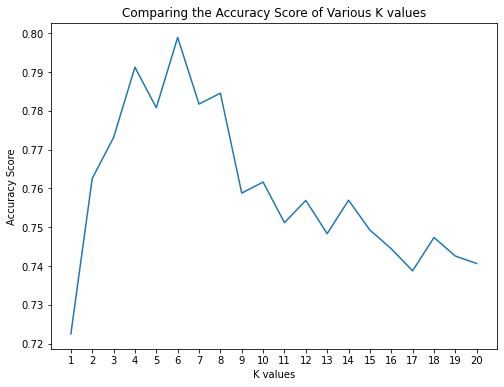

In [18]:
plt.figure(figsize = (8, 6))
plt.plot(k_values, accuracy);
plt.xticks(k_values);
plt.xlabel("K values")
plt.ylabel("Accuracy Score")
plt.title("Comparing the Accuracy Score of Various K values");
np.max(accuracy)

#### 3.4

0.8008150183150182

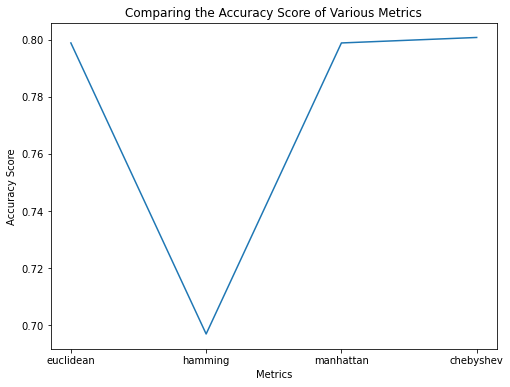

In [19]:
accuracy = []
metric = ['euclidean', 'hamming', 'manhattan', 'chebyshev']

for i in metric:
    KNN = KNeighborsClassifier(n_neighbors=6, metric = i)
    scores = cross_val_score(KNN, X, y, cv=10)
    accuracy.append(np.mean(scores))
    
plt.figure(figsize = (8, 6))
plt.plot(metric, accuracy);
plt.xlabel("Metrics")
plt.ylabel("Accuracy Score")
plt.title("Comparing the Accuracy Score of Various Metrics");
np.max(accuracy)

#### 3.5

In [20]:
titanic = titanic[["pclass", "Sex", "age", "survived"]].dropna()
feature_cols = ["pclass", "Sex", "age"]
X = titanic[feature_cols]
y = titanic.survived
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

KNN = KNeighborsClassifier(n_neighbors=6)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
accuracy_score(y_test, y_pred)

0.7786259541984732

In [21]:
titanic = titanic[["pclass", "Sex", "age", "survived"]].dropna()
feature_cols = ["pclass", "Sex", "age"]
X = titanic[feature_cols]
y = titanic.survived
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
accuracy_score(y_test, y_pred)

0.7595419847328244

## Question 4

#### 4.1

In [22]:
red_wine = pd.read_csv("winequality-red.csv", delimiter = ";")
white_wine = pd.read_csv("winequality-white.csv", delimiter = ";")

red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [23]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [24]:
white_wine.mean()

fixed acidity             6.854788
volatile acidity          0.278241
citric acid               0.334192
residual sugar            6.391415
chlorides                 0.045772
free sulfur dioxide      35.308085
total sulfur dioxide    138.360657
density                   0.994027
pH                        3.188267
sulphates                 0.489847
alcohol                  10.514267
quality                   5.877909
dtype: float64

In [25]:
red_wine.mean()

fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
dtype: float64

In [26]:
white_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [27]:
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']
df = pd.DataFrame({"White Wine": list(white_wine.mean()),
                   "Red Wine": list(red_wine.mean())}, index = columns)

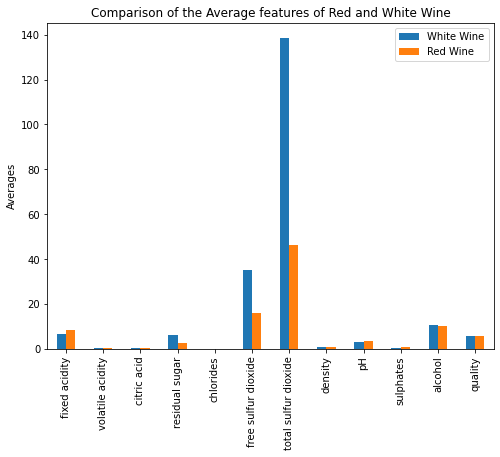

In [28]:
df.plot(kind = "bar", figsize = (8, 6));
plt.ylabel("Averages");
plt.title("Comparison of the Average features of Red and White Wine");

#### 4.2

In [29]:
white_wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


In [30]:
red_wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


#### 4.3

In [31]:
X_white_wine = white_wine[["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]]
y_white_wine = white_wine.quality
X_red_wine = red_wine[["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]]
y_red_wine = red_wine.quality

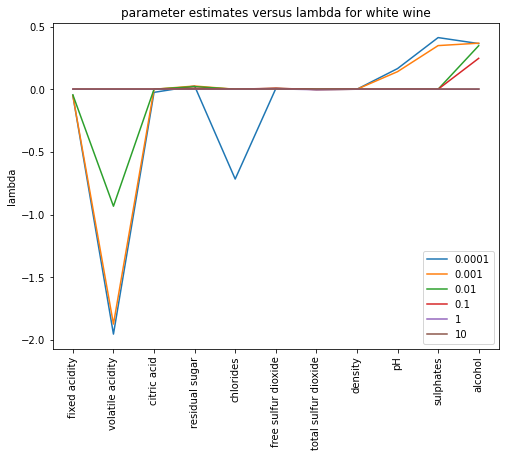

In [36]:
white_wine_mse = []
white_wine_params = []
Lambda = [0.0001, 0.001, 0.01, 0.1, 1, 10]
for i in Lambda:
    model = Lasso(alpha = i)
    model.fit(X_white_wine, y_white_wine)
    white_wine_params.append(model.coef_)
    scores = cross_val_score(model, X_white_wine, y_white_wine, scoring = "neg_mean_squared_error", cv = 10)
    white_wine_mse.append(np.mean(np.absolute(scores)))

i = 0
plt.figure(figsize =(8,6));
for param in white_wine_params:
    plt.plot(X_white_wine.columns, param, label = Lambda[i])
    i = i + 1
    plt.xticks(rotation = 90)

plt.legend();
plt.ylabel("lambda");
plt.title("parameter estimates versus lambda for white wine");

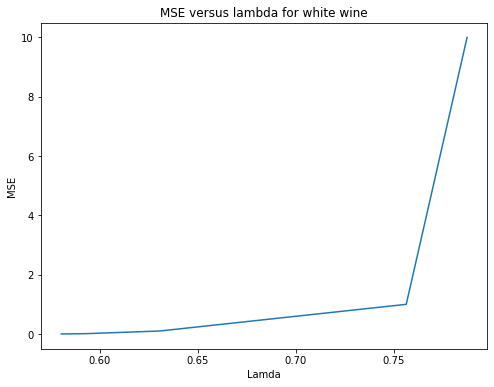

In [33]:
plt.figure(figsize = (8,6))
plt.plot(white_wine_mse, Lambda)
plt.xlabel("Lamda")
plt.ylabel("MSE");
plt.title("MSE versus lambda for white wine");

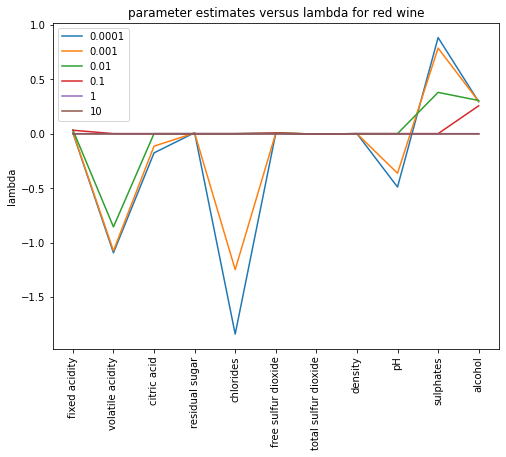

In [34]:
red_wine_mse = []
red_wine_params = []
Lambda = [0.0001, 0.001, 0.01, 0.1, 1, 10]
for i in Lambda:
    model = Lasso(alpha = i)
    model.fit(X_red_wine, y_red_wine)
    red_wine_params.append(model.coef_)
    scores = cross_val_score(model, X_red_wine, y_red_wine, scoring = "neg_mean_squared_error", cv = 10)
    red_wine_mse.append(np.mean(np.absolute(scores)))

i = 0
plt.figure(figsize =(8,6));
for param in red_wine_params:
    plt.plot(X_red_wine.columns, param, label = Lambda[i])
    i = i + 1
    plt.xticks(rotation = 90)

plt.legend();
plt.ylabel("lambda");
plt.title("parameter estimates versus lambda for red wine");

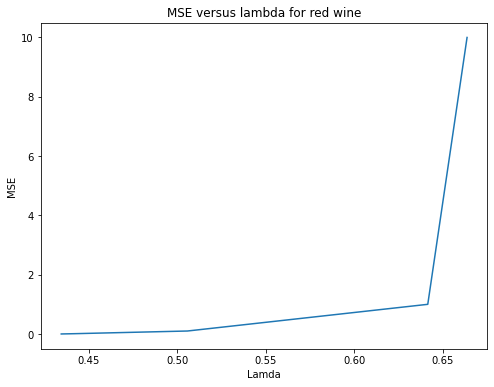

In [35]:
plt.figure(figsize = (8,6))
plt.plot(red_wine_mse, Lambda)
plt.xlabel("Lamda")
plt.ylabel("MSE");
plt.title("MSE versus lambda for red wine");

### 4.4

In [36]:
X = red_wine[["fixed acidity", "volatile acidity", "citric acid","chlorides", "total sulfur dioxide", "pH", "sulphates", "alcohol"]]
y = y_red_wine

In [37]:
accuracy =[]

k_values = [i for i in range(1, 21)]

for i in k_values:
    KNN = KNeighborsRegressor(n_neighbors=i)
    scores = cross_val_score(KNN, X, y, cv=10)
    accuracy.append(np.mean(scores))

0.09131350129073718

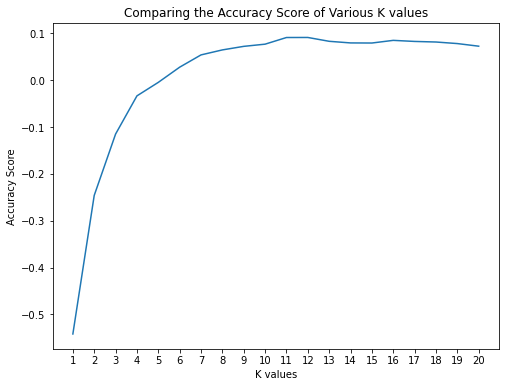

In [38]:
plt.figure(figsize = (8, 6))
plt.plot(k_values, accuracy);
plt.xticks(k_values);
plt.xlabel("K values")
plt.ylabel("Accuracy Score")
plt.title("Comparing the Accuracy Score of Various K values");
np.max(accuracy)

In [39]:
KNN = KNeighborsRegressor(n_neighbors=14)
KNN.fit(X, y)
y_pred = KNN.predict(X)
r2_score(y, y_pred, multioutput='variance_weighted')

0.3498865888614491

In [40]:
mean_squared_error(y, y_pred, multioutput='raw_values')

array([0.42371827])

In [41]:
LR = LinearRegression()
LR.fit(X, y)
y_pred = LR.predict(X)
r2_score(y, y_pred, multioutput='variance_weighted')

0.3581626769907018

In [42]:
mean_squared_error(y, y_pred)

0.41832424012811353